In [1]:
from masskit.utils.index import ArrowLibraryMap
import pyarrow.parquet as pq
from masskit.data_specs.spectral_library import LibraryAccessor

# Use of the spectrum object and spectral library dataframe
The spectrum object contains the precursor and product ions for a spectrum, a dictionary of properties, and a variety of functions to operate on the ions.  
The spectral library is a table of spectrum objects and associated data (nce, precursor charge, etc.), arranged so that there is one spectrum per row and one column per piece of associated data.  The spectral library can be used as a sql database or its in memory equivalent, a pandas dataframe.


## Load a pandas dataframe from the sql version of a spectral library
Limit to precursor charge 2+ and a set of columns.  Specifying the columns is not necessary.  Functions to operate on the pandas dataframe are accessed via importing LibraryAccessor.  LibraryAccessor creates a namespace called "lib" as a member of each dataframe that includes a series of functions that operate on a dataframe. For example, if your dataframe is called df, then df.lib.to_msp('my_file.msp') will dump df to an msp file.

In [2]:
table = ArrowLibraryMap.from_parquet('../../../tests/data/cho_uniq_short.parquet')
df = table.to_pandas().head(10)

## Take the top 10 lines of the dataframe and display in html

id,spectrum,charge,ionization,collision_energy,scan,instrument,ev,nce,mod_names,collision_gas,mod_positions,instrument_type,peptide,insource_voltage,sample_inlet,synonyms,peptide_len,name,ion_mode
0,,2,None,NaN,None,None,46.00,35.00,[4],None,[4],None,AAAACALTPGPLADLAAR,NaN,None,None,18,"AAAACALTPGPLADLAAR/2_1(4,C,Carbamidomethyl)",None
1,,2,None,NaN,None,None,53.00,35.00,[4],None,[4],None,AAAACALTPGPLADLAAR,NaN,None,None,18,"AAAACALTPGPLADLAAR/2_1(4,C,Carbamidomethyl)",None
2,,3,None,NaN,None,None,32.00,35.00,[4],None,[10],None,AAAALGSHGSCSSEVEKETQEK,NaN,None,None,22,"AAAALGSHGSCSSEVEKETQEK/3_1(10,C,Carbamidomethyl)",None
3,,3,None,NaN,None,None,43.00,34.00,[4],None,[10],None,AAAALGSHGSCSSEVEKETQEK,NaN,None,None,22,"AAAALGSHGSCSSEVEKETQEK/3_1(10,C,Carbamidomethyl)",None
4,,3,None,NaN,None,None,45.00,35.00,[4],None,[10],None,AAAALGSHGSCSSEVEKETQEK,NaN,None,None,22,"AAAALGSHGSCSSEVEKETQEK/3_1(10,C,Carbamidomethyl)",None
5,,4,None,NaN,None,None,31.00,35.00,[4],None,[10],None,AAAALGSHGSCSSEVEKETQEK,NaN,None,None,22,"AAAALGSHGSCSSEVEKETQEK/4_1(10,C,Carbamidomethyl)",None
6,,2,None,NaN,None,None,56.00,35.00,[],None,[],None,AAAASAAEAGIATSGTEGER,NaN,None,None,20,AAAASAAEAGIATSGTEGER/2,None
7,,2,None,NaN,None,None,49.00,35.00,[],None,[],None,AAAASGEPLHNEEER,NaN,None,None,15,AAAASGEPLHNEEER/2,None
8,,3,None,NaN,None,None,30.00,34.00,[],None,[],None,AAAASGEPLHNEEER,NaN,None,None,15,AAAASGEPLHNEEER/3,None
9,,2,None,NaN,None,None,60.00,34.00,[4],None,[15],None,AAADLGTEAGVQQLLCTVR,NaN,None,None,19,"AAADLGTEAGVQQLLCTVR/2_1(15,C,Carbamidomethyl)",None

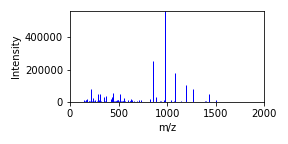
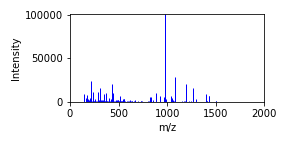
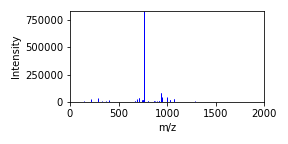
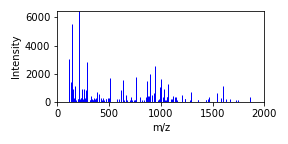
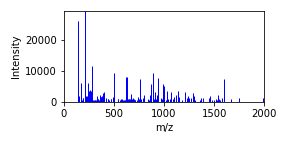
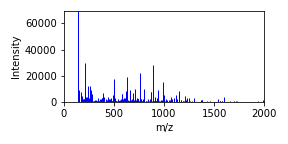
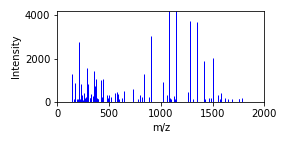
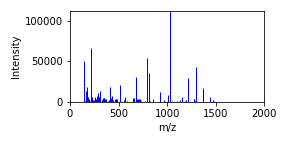
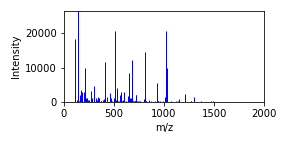
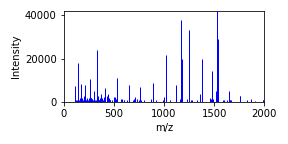

In [3]:
df.lib.display()

## List columns

In [4]:
df.columns

Index(['id', 'spectrum', 'charge', 'ionization', 'collision_energy', 'scan',
       'instrument', 'ev', 'nce', 'mod_names', 'collision_gas',
       'mod_positions', 'instrument_type', 'peptide', 'insource_voltage',
       'sample_inlet', 'synonyms', 'peptide_len', 'name', 'ion_mode'],
      dtype='object')

## Iterating through a dataframe

In [5]:
for row in df.head(10).itertuples():
    print (row.peptide, row.nce)

AAAACALTPGPLADLAAR 35.0
AAAACALTPGPLADLAAR 35.0
AAAALGSHGSCSSEVEKETQEK 35.0
AAAALGSHGSCSSEVEKETQEK 34.0
AAAALGSHGSCSSEVEKETQEK 35.0
AAAALGSHGSCSSEVEKETQEK 35.0
AAAASAAEAGIATSGTEGER 35.0
AAAASGEPLHNEEER 35.0
AAAASGEPLHNEEER 34.0
AAADLGTEAGVQQLLCTVR 34.0


## Extract a single spectrum from the second row of the dataframe

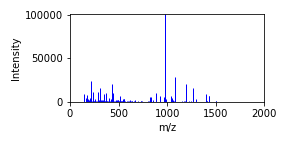

In [6]:
spectrum = df.iloc[1]['spectrum']
spectrum

# Iterate through the product ions

In [7]:
for mz, intensity in spectrum.products:
    print(f'{mz}: {intensity}, ', end='')

143.0814: 9555.6, 169.097: 5174.5, 171.1126: 2428.2, 175.1069: 1175.7, 175.1187: 7806.9, 178.0645: 645.1, 181.0971: 2623.7, 183.1495: 1770.8, 185.0921: 4004.0, 185.1288: 983.4, 199.1073: 2854.3, 203.1022: 2225.3, 203.412: 489.7, 204.0803: 4532.0, 211.1438: 1671.5, 212.103: 6959.1, 214.1185: 23984.8, 215.0481: 1035.3, 215.1219: 1943.5, 215.1392: 1652.7, 216.0967: 632.6, 229.1299: 970.3, 231.1446: 601.8, 232.0748: 11826.6, 235.1929: 547.3, 240.1344: 3195.6, 242.1137: 1025.5, 246.1558: 1514.8, 255.1454: 790.9, 256.1652: 1376.9, 257.1605: 3523.6, 258.0901: 1119.1, 268.1656: 1623.7, 282.1807: 1542.2, 283.14: 10639.1, 284.1443: 1021.0, 285.1555: 11955.3, 286.1599: 1072.8, 286.1761: 2533.2, 293.366: 528.7, 298.177: 1429.9, 302.1818: 2634.5, 303.1121: 15782.5, 304.1151: 1344.9, 309.1558: 945.0, 311.1712: 2335.2, 317.1934: 2115.0, 327.2036: 961.2, 328.1647: 1131.6, 329.1273: 3077.6, 331.1088: 859.4, 337.2232: 2252.0, 339.2033: 1220.8, 341.1834: 794.7, 345.1589: 6582.2, 346.1541: 1361.2, 353.218

## Iterate by index through the product ions

In [8]:
for i in range(len(spectrum.products)):
    print(spectrum.products[i], end=' ')

(143.0814, 9555.6) (169.097, 5174.5) (171.1126, 2428.2) (175.1069, 1175.7) (175.1187, 7806.9) (178.0645, 645.1) (181.0971, 2623.7) (183.1495, 1770.8) (185.0921, 4004.0) (185.1288, 983.4) (199.1073, 2854.3) (203.1022, 2225.3) (203.412, 489.7) (204.0803, 4532.0) (211.1438, 1671.5) (212.103, 6959.1) (214.1185, 23984.8) (215.0481, 1035.3) (215.1219, 1943.5) (215.1392, 1652.7) (216.0967, 632.6) (229.1299, 970.3) (231.1446, 601.8) (232.0748, 11826.6) (235.1929, 547.3) (240.1344, 3195.6) (242.1137, 1025.5) (246.1558, 1514.8) (255.1454, 790.9) (256.1652, 1376.9) (257.1605, 3523.6) (258.0901, 1119.1) (268.1656, 1623.7) (282.1807, 1542.2) (283.14, 10639.1) (284.1443, 1021.0) (285.1555, 11955.3) (286.1599, 1072.8) (286.1761, 2533.2) (293.366, 528.7) (298.177, 1429.9) (302.1818, 2634.5) (303.1121, 15782.5) (304.1151, 1344.9) (309.1558, 945.0) (311.1712, 2335.2) (317.1934, 2115.0) (327.2036, 961.2) (328.1647, 1131.6) (329.1273, 3077.6) (331.1088, 859.4) (337.2232, 2252.0) (339.2033, 1220.8) (341.18

### Access underlying numpy arrays

In [9]:
print(spectrum.products.mz)
print(spectrum.products.intensity)

[ 143.0814  169.097   171.1126  175.1069  175.1187  178.0645  181.0971
  183.1495  185.0921  185.1288  199.1073  203.1022  203.412   204.0803
  211.1438  212.103   214.1185  215.0481  215.1219  215.1392  216.0967
  229.1299  231.1446  232.0748  235.1929  240.1344  242.1137  246.1558
  255.1454  256.1652  257.1605  258.0901  268.1656  282.1807  283.14
  284.1443  285.1555  286.1599  286.1761  293.366   298.177   302.1818
  303.1121  304.1151  309.1558  311.1712  317.1934  327.2036  328.1647
  329.1273  331.1088  337.2232  339.2033  341.1834  345.1589  346.1541
  353.2189  354.1769  355.1793  356.1933  357.211   358.2065  363.3883
  365.2181  366.2212  368.1942  369.3904  370.4914  372.1714  374.149
  375.153   380.1929  384.1859  386.2027  396.2243  397.2071  398.2401
  400.1644  401.1676  402.1434  408.2588  410.2415  416.1944  417.192
  418.1938  422.2396  425.2144  428.1953  430.2767  431.2812  436.2548
  442.2117  445.1862  446.1865  446.2101  454.23    459.2378  471.2021
  473.1871

## Access mass tolerance and type

In [10]:
print (spectrum.precursor.tolerance, spectrum.precursor.tolerance_type)

10.0 ppm


## Query on the dataframe to return a dataframe containing rows that match the query, then display the new dataframe

id,spectrum,charge,ionization,collision_energy,scan,instrument,ev,nce,mod_names,collision_gas,mod_positions,instrument_type,peptide,insource_voltage,sample_inlet,synonyms,peptide_len,name,ion_mode
0,,2,None,NaN,None,None,46.00,35.00,[4],None,[4],None,AAAACALTPGPLADLAAR,NaN,None,None,18,"AAAACALTPGPLADLAAR/2_1(4,C,Carbamidomethyl)",None
1,,2,None,NaN,None,None,53.00,35.00,[4],None,[4],None,AAAACALTPGPLADLAAR,NaN,None,None,18,"AAAACALTPGPLADLAAR/2_1(4,C,Carbamidomethyl)",None

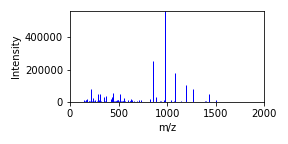
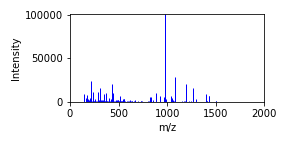

In [11]:
df_single_peptide = df.query('peptide == "AAAACALTPGPLADLAAR"')
df_single_peptide.lib.display()

## Select one spectrum from the new dataframe, filter out low m/z peaks, normalize the base intensity to 1.0

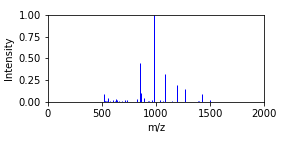

In [12]:
new_spectrum = df_single_peptide.iloc[0]['spectrum']
new_spectrum = new_spectrum.filter(min_mz=500).norm(1.0)
new_spectrum

## Aggregation functions
### Number of ions

In [13]:
new_spectrum.num_ions()

41

### Total ion current

In [14]:
new_spectrum.total_intensity()

3.7164676737052043

## Operations on pairs of spectra
### First, take a second spectra from the new dataframe

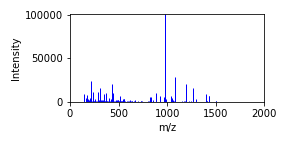

In [15]:
new_spectrum_2 = df_single_peptide.iloc[1]['spectrum']
new_spectrum_2

### Cosine score between two spectra

In [16]:
new_spectrum.cosine_score(new_spectrum_2)

379.04197045480157

### Cosine score between mz subranges

In [17]:
new_spectrum.filter(min_mz=500, max_mz=1000).cosine_score(new_spectrum_2.filter(min_mz=500, max_mz=1000))

591.3861103986281

### Merge two spectra, first by creating a filter spectrum

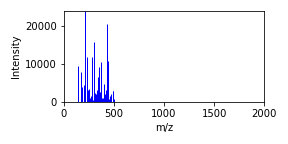

In [18]:
new_spectrum_2.filter(max_mz=500, inplace=True)
new_spectrum_2

#### Then merge with previous spectrum

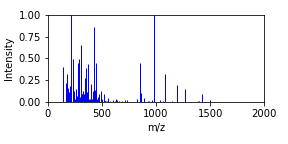

In [19]:
new_spectrum.merge(new_spectrum_2.norm(1))

## Input/output
The spectral library in the form of a dataframe has the ability to read and write a variety of formats in addition to reading from SQL as listed above.
There is a command line program, apps/process/libraries/converter.py, that uses the following APIs
to convert to/from these file types.

### MSP

id,spectrum,charge,ionization,collision_energy,scan,instrument,ev,nce,mod_names,collision_gas,mod_positions,instrument_type,peptide,insource_voltage,sample_inlet,synonyms,peptide_len,name,ion_mode
0,,2,None,NaN,None,None,46.00,35.00,None,None,None,None,AAAACALTPGPLADLAAR,NaN,None,None,18,"AAAACALTPGPLADLAAR/2_1(4,C,Carbamidomethyl)",None
1,,2,None,NaN,None,None,53.00,35.00,None,None,None,None,AAAACALTPGPLADLAAR,NaN,None,None,18,"AAAACALTPGPLADLAAR/2_1(4,C,Carbamidomethyl)",None

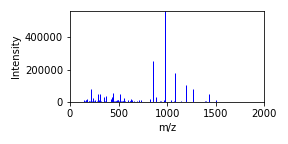
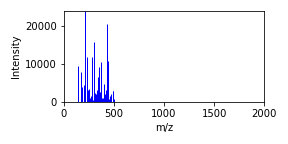

In [20]:
# write out msp file with annotations
df_single_peptide.lib.to_msp("single_peptide.msp", annotate=True)

# read msp into arrow, arrow into pandas
df2 = ArrowLibraryMap.from_msp("single_peptide.msp").to_pandas()
df2.head().lib.display()

#### save a single spectrum at row 0 as an msp file

In [21]:
df_single_peptide.iloc[[0]].lib.to_msp("single_spectrum.msp")

### MGF

In [22]:
# reading mgf currently not supported


### SDF

id,spectrum,charge,ionization,collision_energy,experimental_ri_data,scan,instrument,ev,stdnp_data,stdnp_error,stdpolar,stdpolar_error,column,nce,stdpolar_data,collision_gas,instrument_type,vial_id,insource_voltage,sample_inlet,experimental_ri,stdnp,synonyms,experimental_ri_error,name,ion_mode
250572,,NaN,None,NaN,NaN,None,None,NaN,4,3.00,NaN,NaN,None,NaN,NaN,None,None,NaN,NaN,None,NaN,1309.00,"[""Benzoic acid, 2-(acetyloxy)-"", ""Salicylic acid acetate"", ""o-Acetoxybenzoic acid"", ""o-Carboxyphenyl acetate"", ""A.S.A."", ""A.S.A. Empirin"", ""Acenterine"", ""Acesal"", ""Acetal"", ""Aceticyl"", ""Acetilum Acidulatum"", ""Acetisal"", ""Acetol"", ""Acetophen"", ""Acetosal"", ""Acetosalic acid"", ""Acetosalin"", ""Acetylin"", ""Acetylsal"", ""Acetylsalicylic acid"", ""Acidum acetylsalicylicum"", ""Acisal"", ""Acylpyrin"", ""Asagran"", ""Aspro"", ""Asteric"", ""AC 5230"", ""ASA"", ""Benaspir"", ""Bialpirina"", ""Colfarit"", ""Dolean PH 8"", ""Duramax"", ""Ecotrin"", ""Empirin"", ""Endydol"", ""Enterophen"", ""Enterosarein"", ""Enterosarine"", ""Globentyl"", ""Globoid"", ""Helicon"", ""Idragin"", ""Measurin"", ""Neuronika"", ""Novid"", ""Polopiryna"", ""Rheumintabletten"", ""Rhodine"", ""Rhonal"", ""Salacetin"", ""Salcetogen"", ""Saletin"", ""SP 189"", ""Temperal"", ""Triple-Sal"", ""Xaxa"", ""Yasta"", ""2-(Acetyloxy)benzoic acid"", ""2-Acetoxybenzoic acid"", ""2-Carboxyphenyl acetate"", ""O-acetylsalicylic acid"", ""Acetonyl"", ""Acetylsalicylsaure"", ""Acide acetylsalicylique"", ""Adiro"", ""Aspec"", ""Aspergum"", ""Aspirdrops"", ""Aspirine"", ""Bi-prin"", ""Cemirit"", ""Claradin"", ""Clariprin"", ""Crystar"", ""Decaten"", ""Ecolen"", ""Entericin"", ""Extren"", ""ECM"", ""Levius"", ""Micristin"", ""Pharmacin"", ""Pirseal"", ""Premaspin"", ""S-211"", ""Solfrin"", ""Solprin acid"", ""Spira-Dine"", ""St. Joseph"", ""Acetilsalicilico"", ""Acido acetilsalicilico"", ""Acimetten"", ""Acido O-acetil-benzoico"", ""Asatard"", ""Aspalon"", ""Bialpirinia"", ""Caprin"", ""Contrheuma retard"", ""Delgesic"", ""Entrophen"", ""Kyselina 2-acetoxybenzoova"", ""Kyselina acetylsalicylova"", ""Solpyron"", ""Bayer"", ""Bufferin"", ""Easprin"", ""St. Joseph Aspirin for Adults"", ""2-Acetylsalicyclic acid"", ""Ascoden-30"", ""Coricidin"", ""Nu-seals"", ""Nu-seals aspirin"", ""Persistin"", ""Supac"", ""Tasprin"", ""Triaminicin"", ""Salicylic acid, acetyl-"", ""o-(Acetyloxy)benzoic acid"", ""Zorprin"", ""Magnecyl"", ""Miniasal"", ""Colsprin"", ""Acesan"", ""Acetard"", ""Ascolong"", ""Aspropharm"", ""Salycylacetylsalicylic acid"", ""Kapsazal"", ""A.S.A. and Codeine Compound (Salt/Mix)"", ""Anacin (Salt/Mix)"", ""Anacin Maximum Strength (Salt/Mix)"", ""Arthritis Pain Formula Maximum Strength (Salt/Mix)"", ""Ascriptin (Salt/Mix)"", ""Axotal (Salt/Mix)"", ""Dasin (Salt/Mix)"", ""Empirin with Codeine (Salt/Mix)"", ""Equagesic (Salt/Mix)"", ""Fiorinal (Salt/Mix)"", ""Micrainin (Salt/Mix)"", ""Norgesic (Salt/Mix)"", ""P-A-C Analgesic Tablets (Salt/Mix)"", ""Percodan (Salt/Mix)"", ""Percodan Demi (Salt/Mix)"", ""Phensal (Salt/Mix)"", ""Pravigard PAC (Salt/Mix)"", ""Robaxisal (Salt/Mix)"", ""SK-65 Compound (Salt/Mix)"", ""Soma Compound (Salt/Mix)"", ""Synalgos (Salt/Mix)"", ""Synalgos-DC (Salt/Mix)"", ""Vanquish (Salt/Mix)"", ""component of Zactirin (Salt/Mix)"", ""component of Ansemco 2 (Salt/Mix)"", ""component of Ascodeen-30 (Salt/Mix)"", ""component of Darvon with A.S.A (Salt/Mix)"", ""component of Midol (Salt/Mix)""]",NaN,Aspirin,None

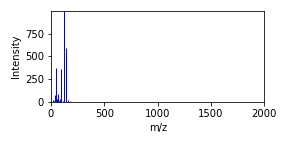

In [25]:
df3 = ArrowLibraryMap.from_sdf("../../../tests/data/test.new.sdf").to_pandas()
df3.head(1).lib.display()

### PKL (python pickle)

In [26]:
import pandas
df_single_peptide.to_pickle('single_peptide.pkl')
df_4 = pandas.read_pickle('single_peptide.pkl')

## CSV

In [27]:
df_single_peptide.to_csv('single_peptide.csv')